# Unsupervised learning - Clustering 

### Importing the libraries

In [1]:
import numpy as np  # for linear algebra 
import pandas as pd # for data processing 
from sklearn.compose import ColumnTransformer 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, LabelEncoder # normalize the data
from sklearn.cluster import KMeans # Clustering algorithm 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Loading the data

**The Dataset**

The Dataset was taken from this link https://archive.ics.uci.edu/ml/datasets/wine. 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1. Alcohol
2. Malic acid
3. Ash.
4. Alcalinity of ash.
5. Magnesium.
6. Total phenols.
7. Flavanoids.
8. Nonflavanoid phenols.
9. Proanthocyanins.
10. Color intensity.
11. Hue.
12. OD280/OD315 of diluted wines.
13. Proline.

In [55]:
data = pd.read_csv('wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.shape 

(178, 13)

### Data pre-processing 

Let us check the dataset for any missing values or detecting the outliers.

In [4]:
# Checking any missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


It is clear that there are no missing dataset. 

In this dataset, removing a outlier could lead to information loss since it contributes the wine composition, thus the outlier are important.

### Data exploration and visualization

Let us first explore the dataset statistically.

In [5]:
data.describe() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


From the statistics, it is clear that,
1. The number of samples for each variable is consistent, with 178 measurements in total.
2. The mean values and standard deviations vary widely across the variables, suggesting that each variable may have a different range and distribution of values.
3. The minimum and maximum values also vary across the variables, with some variables (such as "Color Intensity") having much larger ranges than others (such as "Nonflavanoid Phenols").
4. The quartile ranges provide information about the spread of the data. For example, the interquartile range (the middle 50% of the data) for "Alcohol" is relatively narrow (between 12.36% and 13.68%), while the interquartile range for "Proline" is much wider (between 500.5 mg/l and 985 mg/l).

We then visualize the dataset and check for the correlation betweem features.

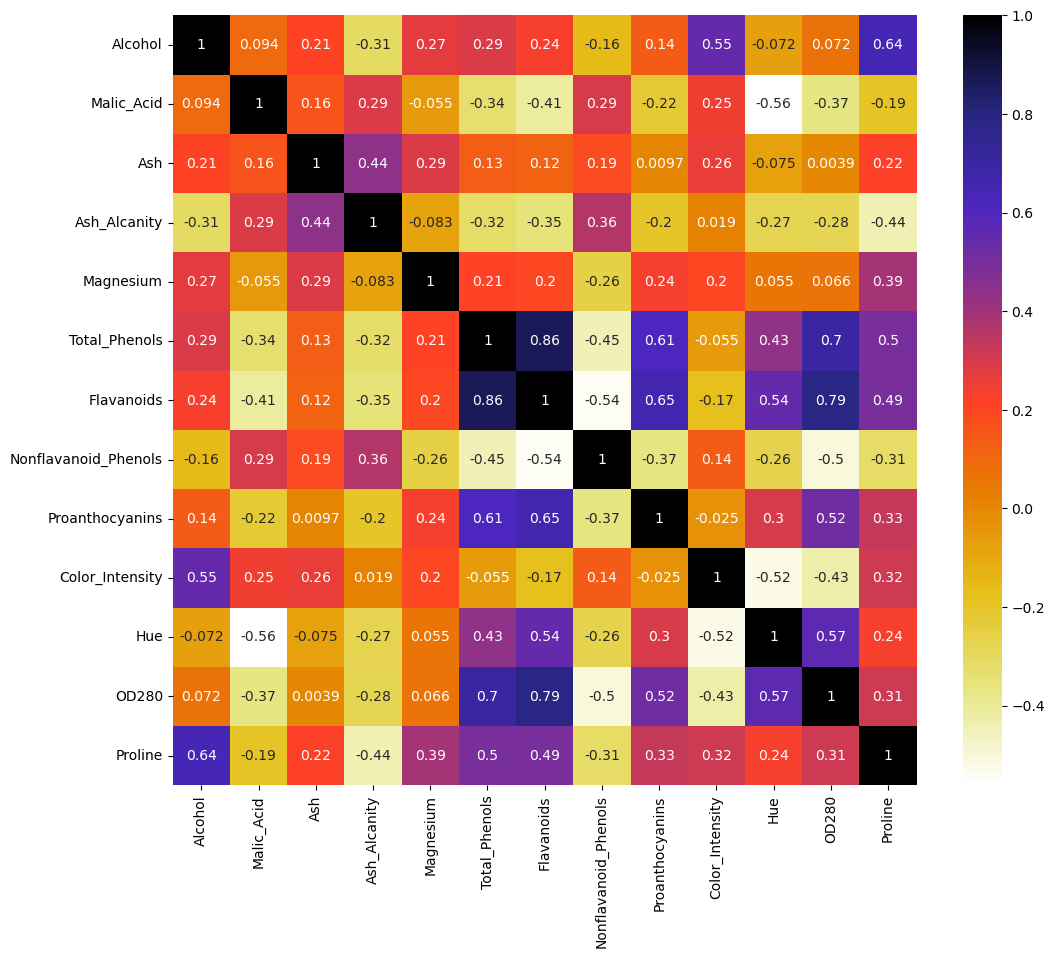

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [7]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

With the above function, the correlation between the features or variables greater than threshold value are resulted out. This function helps in identifying the dependent variable. The thershold is considered as 0.8.

In [49]:
correlated_feature = correlation(data, 0.65)
len(set(correlated_feature))

3

In [53]:
correlated_feature

{'Flavanoids', 'OD280', 'Proanthocyanins'}

In [56]:
data.drop(correlated_feature,axis=1, inplace=True)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,4.32,1.04,735
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,7.70,0.64,740
174,13.40,3.91,2.48,23.0,102,1.80,0.43,7.30,0.70,750
175,13.27,4.28,2.26,20.0,120,1.59,0.43,10.20,0.59,835
176,13.17,2.59,2.37,20.0,120,1.65,0.53,9.30,0.60,840


### Feature Scaling 

Once the features are selected for the clustering, it is necessary to standardize the dataset by subtracting the mean and dividing by the standard deviation.

Standardize the using the StandardScaler function from Sklearn.

In [32]:
scaler = StandardScaler()

We then fit the standard scaler to the data and then transform our data using that scaler.

The transformed data are stored in the same dataset which could be useful in future.

In [58]:
#data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Proanthocyanins_T','Color_Intensity_T','Hue_T','OD280_T','Proline_T']] = scaler.fit_transform(data[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']])
#X = data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Proanthocyanins_T','Color_Intensity_T','Hue_T','OD280_T','Proline_T']] 

#data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Proanthocyanins_T','Color_Intensity_T','Hue_T','Proline_T']] = scaler.fit_transform(data[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','Proline']])
#X = data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Proanthocyanins_T','Color_Intensity_T','Hue_T','Proline_T']] 

data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Color_Intensity_T','Hue_T','Proline_T']] = scaler.fit_transform(data[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Nonflavanoid_Phenols','Color_Intensity','Hue','Proline']])
X = data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Color_Intensity_T','Hue_T','Proline_T']] 

#data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Color_Intensity_T','Hue_T']] = scaler.fit_transform(data[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Nonflavanoid_Phenols','Color_Intensity','Hue']])
#X = data[['Alcohol_T','Malic_Acid_T','Ash_T','Ash_Alcanity_T','Magnesium_T','Total_Phenols_T','Nonflavanoid_Phenols_T','Color_Intensity_T','Hue_T']] 

X

,Alcohol_T,Malic_Acid_T,Ash_T,Ash_Alcanity_T,Magnesium_T,Total_Phenols_T,Nonflavanoid_Phenols_T,Color_Intensity_T,Hue_T,Proline_T
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,0.251717,0.362177,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.293321,0.406051,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,0.269020,0.318304,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.186068,-0.427544,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,-0.319276,0.362177,-0.037874
...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,1.274310,1.142811,-1.392758,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,0.549108,0.969783,-1.129518,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,0.549108,2.224236,-1.612125,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,1.354888,1.834923,-1.568252,0.296498


### Performing Principal Component Analysis (PCA)

PCA is a technique used to simplify and improve the accuracy of clustering algorithms. It reduces the number of variables in a dataset, which helps to remove redundant information and noise. Additionally, it helps to identify relationships between variables and reveal patterns in the data. PCA can also help to address issues related to variables that are highly correlated with each other, which can cause problems in clustering algorithms.

Overall, PCA is a useful tool for preprocessing datasets before clustering, as it can improve the accuracy and stability of the results.


In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_trans = pca.fit_transform(X)
pca_data = pd.DataFrame(pca_trans, columns=['p1', 'p2'])

pca_data.shape

(178, 2)

In [60]:
pca_data.describe()

,p1,p2
count,1.780000e+02,1.780000e+02
mean,4.091608e-16,7.484650e-17
std,1.748964e+00,1.554994e+00
min,-3.360432e+00,-3.657303e+00
25%,-1.406480e+00,-1.063710e+00
50%,-4.075559e-01,-2.776581e-01
75%,1.645238e+00,1.347009e+00
max,3.917818e+00,3.769557e+00


Next step is to find the number of clusters underly in the transformed data.

### Clustering the data

#### Identfying the Optimum Number of Clusters

There are number of ways to determine the number of clusters. Here, we are using Elbow method.

The Elbow method plots the inertia, which is a measure of how well the data was clustered by the K-meandsalgorithm, against the number of clusters. 

In [61]:
# Create function to determine optimum number of clusters

def optimal_k_means(data, max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    # Elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\Sharan Aakash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


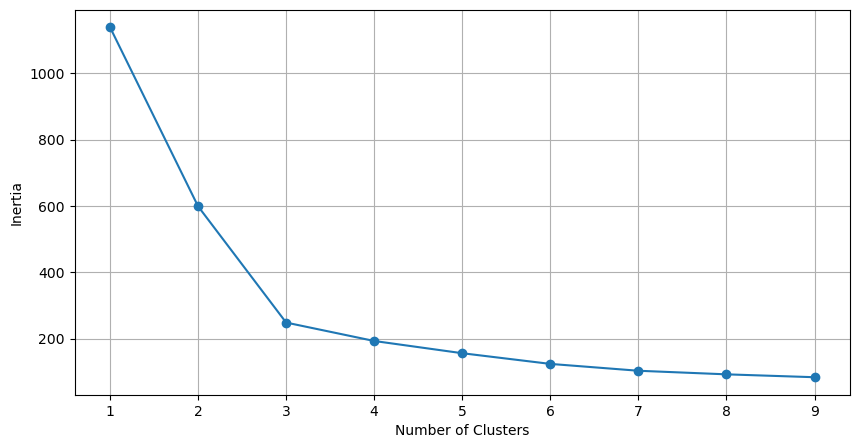

In [16]:
optimal_k_means(pca_data,10)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) descreases as we increase the number of clusters. We can see that there is big change in inertia and slope from 2 clusters onwards.

### Applying K means Clustering 


In [62]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [63]:
data['cluster']=kmeans.labels_
pca_data['cluster']=kmeans.labels_

In [40]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Color_Intensity,Hue,Alcohol_T,Malic_Acid_T,Ash_T,Ash_Alcanity_T,Magnesium_T,Total_Phenols_T,Nonflavanoid_Phenols_T,Color_Intensity_T,Hue_T,cluster
0,14.23,1.71,2.43,15.6,127,2.80,0.28,5.64,1.04,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,0.251717,0.362177,1
1,13.20,1.78,2.14,11.2,100,2.65,0.26,4.38,1.05,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.293321,0.406051,1
2,13.16,2.36,2.67,18.6,101,2.80,0.30,5.68,1.03,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,0.269020,0.318304,1
3,14.37,1.95,2.50,16.8,113,3.85,0.24,7.80,0.86,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.186068,-0.427544,1
4,13.24,2.59,2.87,21.0,118,2.80,0.39,4.32,1.04,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,-0.319276,0.362177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,7.70,0.64,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,1.274310,1.142811,-1.392758,0
174,13.40,3.91,2.48,23.0,102,1.80,0.43,7.30,0.70,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,0.549108,0.969783,-1.129518,0
175,13.27,4.28,2.26,20.0,120,1.59,0.43,10.20,0.59,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,0.549108,2.224236,-1.612125,0
176,13.17,2.59,2.37,20.0,120,1.65,0.53,9.30,0.60,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,1.354888,1.834923,-1.568252,0


In [64]:
pca_data

,p1,p2,cluster
0,2.700401,-1.035137,2
1,2.254771,0.809033,2
2,1.435914,-0.782642,2
3,3.517674,-2.118927,2
4,0.526235,-0.914110,2
...,...,...,...
173,-2.129301,-2.725118,0
174,-1.496276,-2.013521,0
175,-1.140962,-2.903691,0
176,-0.971053,-2.380218,0


### Plotting the Results


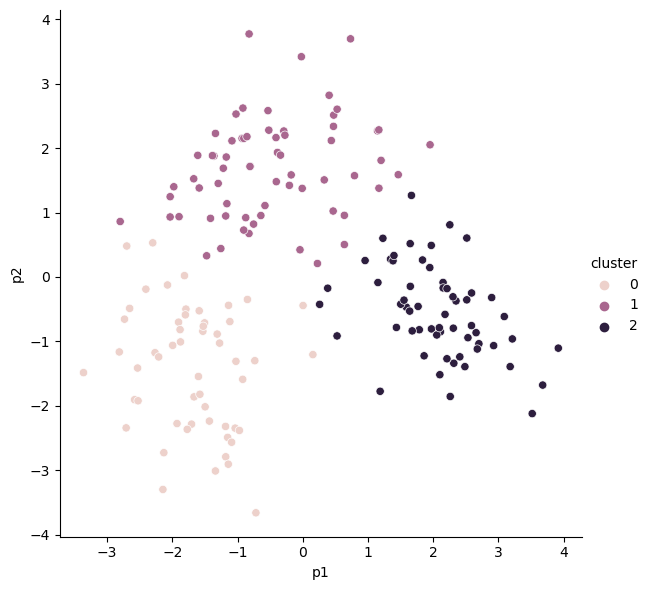

In [65]:
sns.relplot(x="p1", y="p2", hue="cluster", data=pca_data, height=6)

#### Visualizing Multiple Clusters


In [66]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(pca_data)
    X[f'Kmeans_{k}'] = kmeans.labels_

C:\Users\Sharan Aakash\AppData\Local\Temp\ipykernel_31604\3254287889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'Kmeans_{k}'] = kmeans.labels_
C:\Users\Sharan Aakash\AppData\Local\Temp\ipykernel_31604\3254287889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'Kmeans_{k}'] = kmeans.labels_
C:\Users\Sharan Aakash\AppData\Local\Temp\ipykernel_31604\3254287889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [67]:
X

,Alcohol_T,Malic_Acid_T,Ash_T,Ash_Alcanity_T,Magnesium_T,Total_Phenols_T,Nonflavanoid_Phenols_T,Color_Intensity_T,Hue_T,Proline_T,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6,Kmeans_7,Kmeans_8
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,0.251717,0.362177,1.013009,1,2,1,1,5,6,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.293321,0.406051,0.965242,1,2,1,1,0,1,4
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,0.269020,0.318304,1.395148,1,2,1,1,0,1,4
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.186068,-0.427544,2.334574,1,2,1,1,5,6,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,-0.319276,0.362177,-0.037874,1,2,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,1.274310,1.142811,-1.392758,-0.021952,0,0,2,4,2,4,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,0.549108,0.969783,-1.129518,0.009893,0,0,2,4,2,4,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,0.549108,2.224236,-1.612125,0.280575,0,0,2,4,2,4,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,1.354888,1.834923,-1.568252,0.296498,0,0,2,4,2,4,0


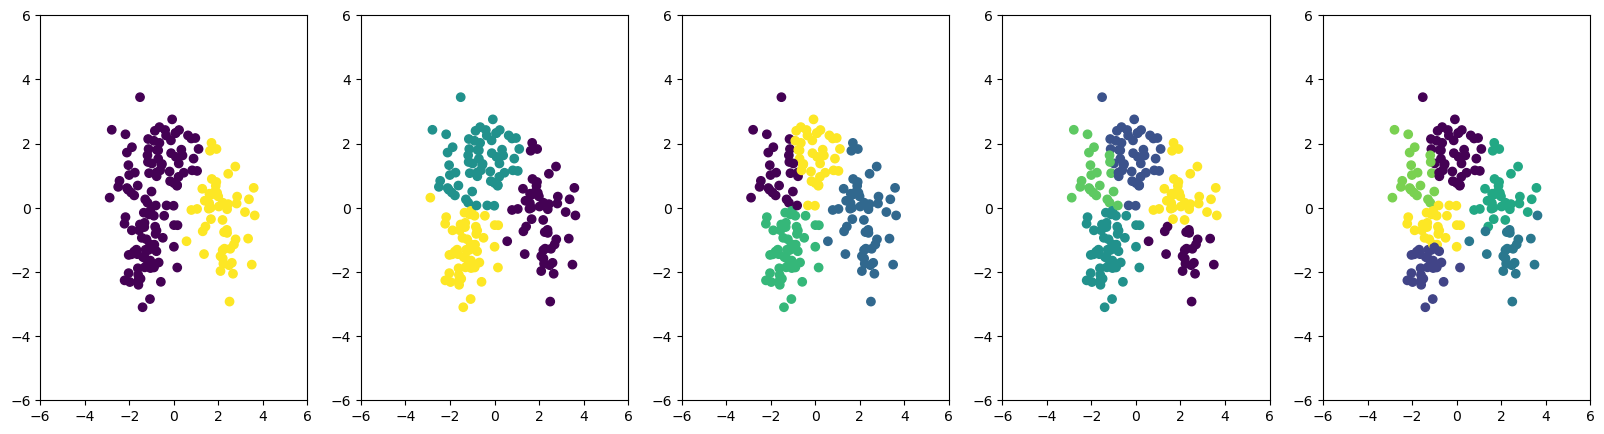

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i,ax in enumerate(fig.axes, start=2):
    ax.scatter(x=pca_data["p1"], y=pca_data["p2"], c=X[f'Kmeans_{i}'])
    ax.set_xlim(-6,6)
    ax.set_ylim(-6,6)

### Validation of clustering 

It is primary to evaluate the number of cluster (k) consider from the elbow method.

Since there is no ground truth for this dataset. Silhouette Score is calculated below for different K means which provides broader idea of quality of the cluster. 

The silhouette score can range from -1, 1,where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters 

For n_clusters = 2 The average silhouette_score is : 0.16306012419433838
For n_clusters = 3 The average silhouette_score is : 0.21416313596453546
For n_clusters = 4 The average silhouette_score is : 0.23459880442466033
For n_clusters = 5 The average silhouette_score is : 0.291198956924217
For n_clusters = 6 The average silhouette_score is : 0.4273709579167708
For n_clusters = 7 The average silhouette_score is : 0.3579783338143658
For n_clusters = 8 The average silhouette_score is : 0.31683822754482605


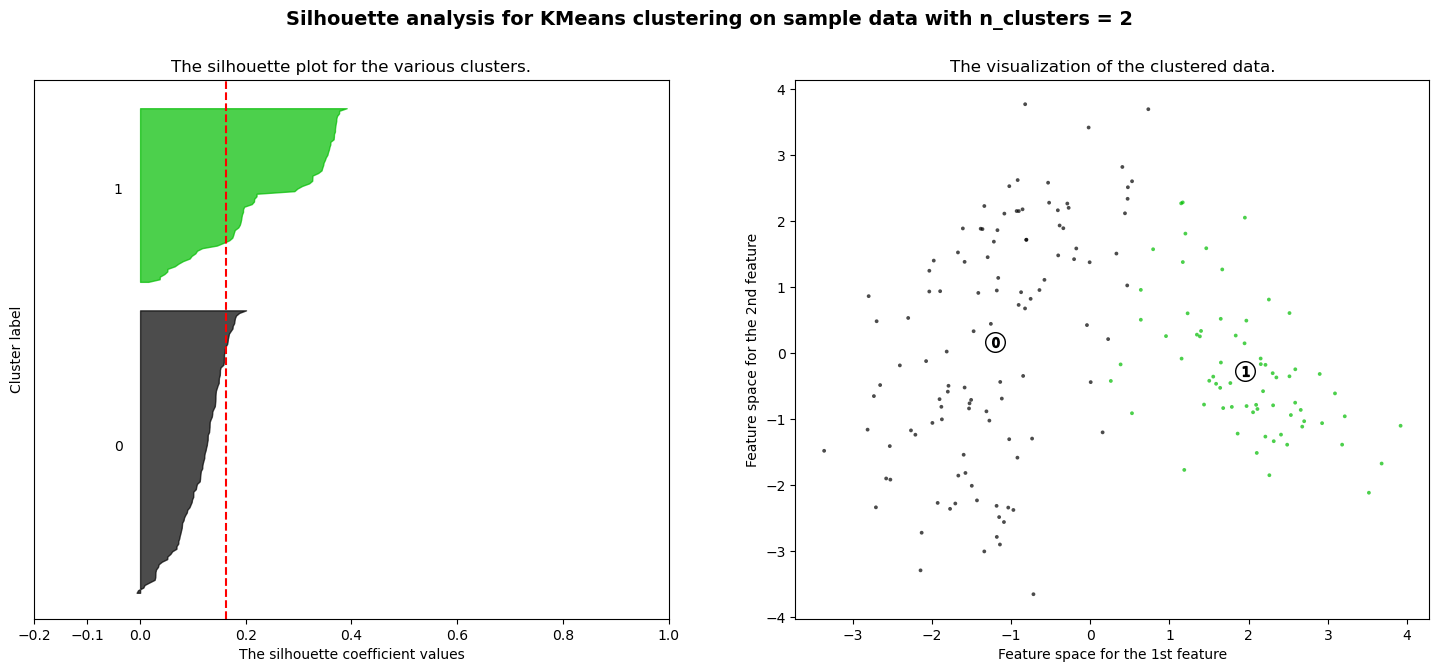

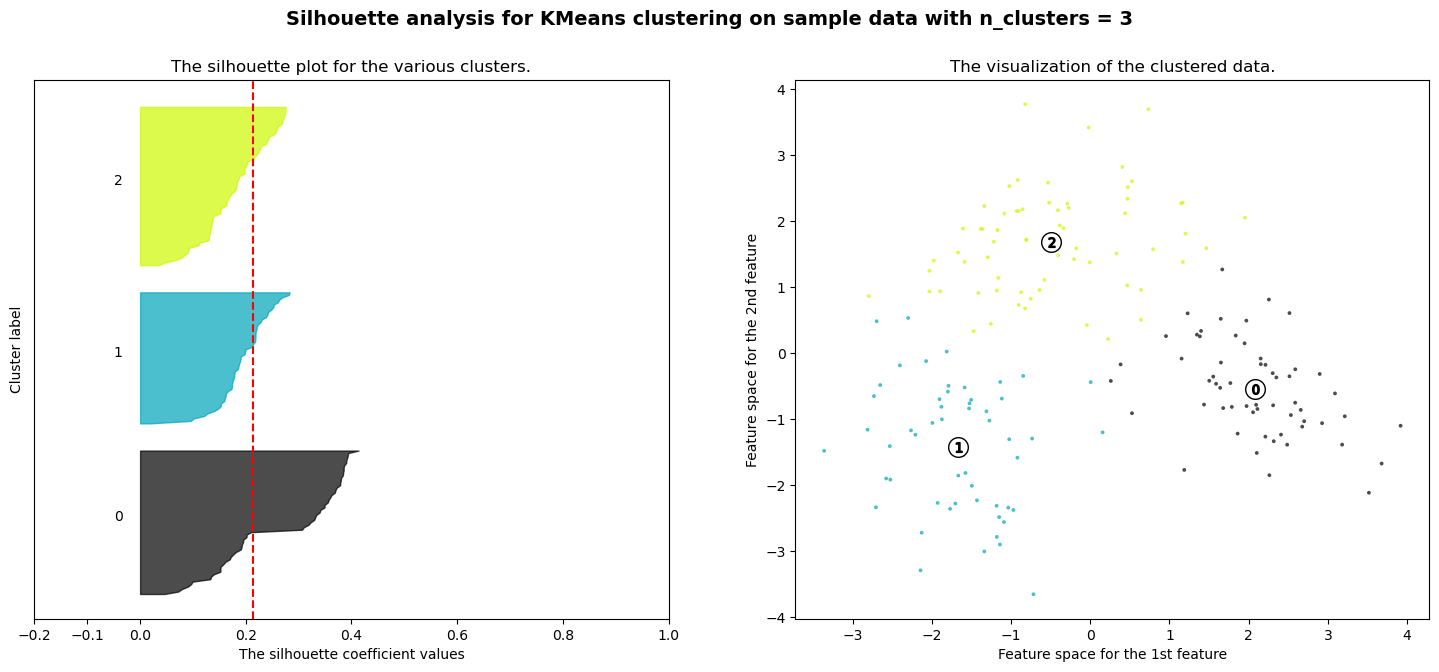

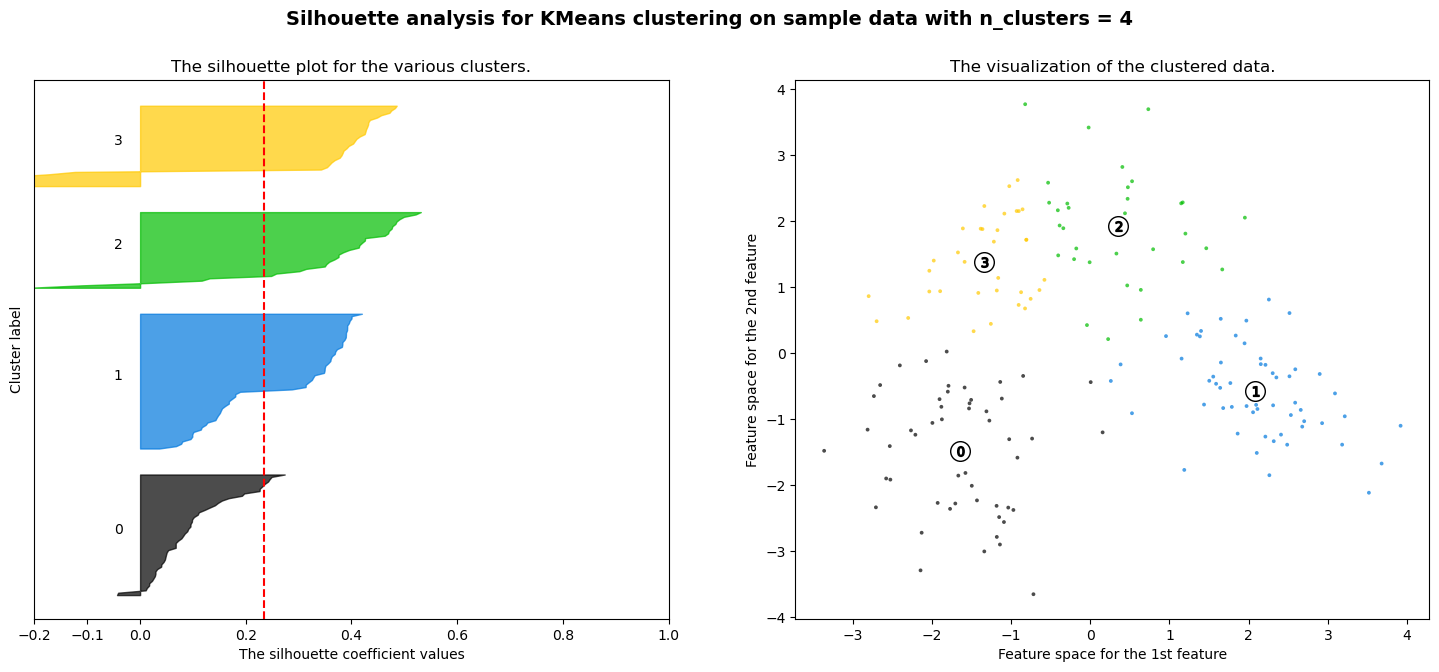

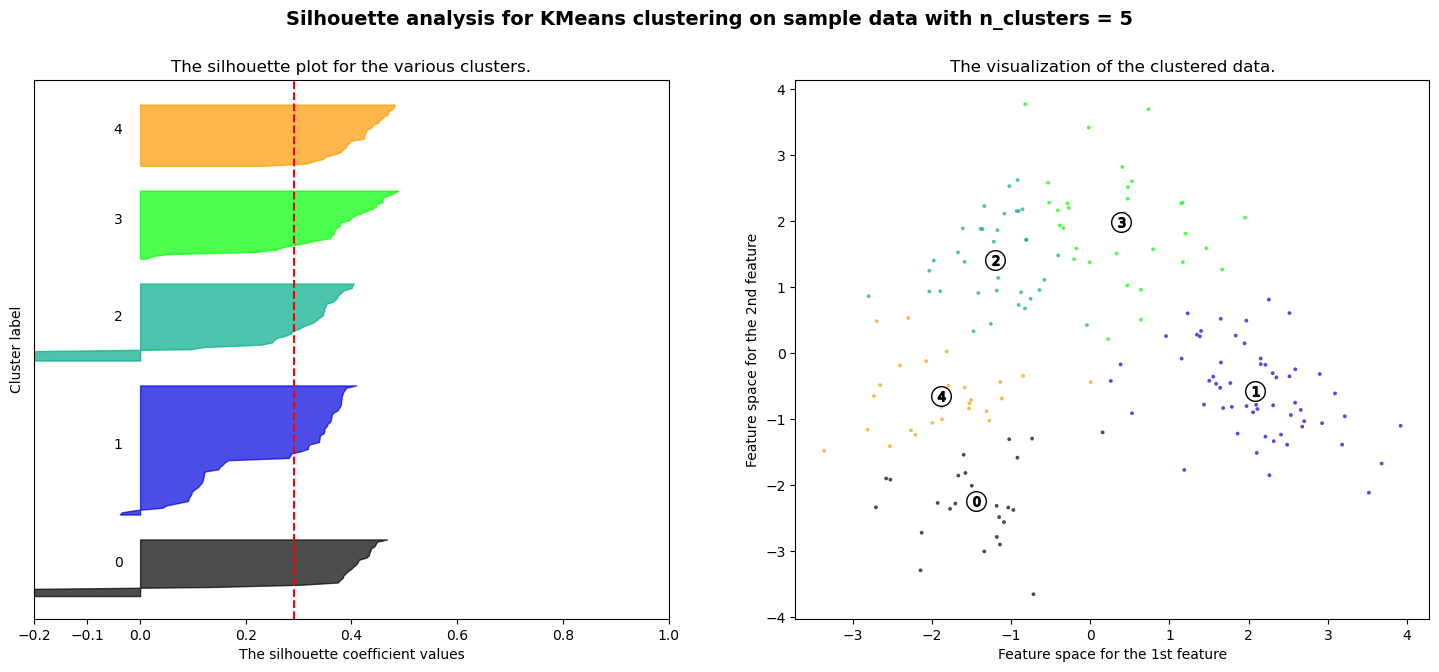

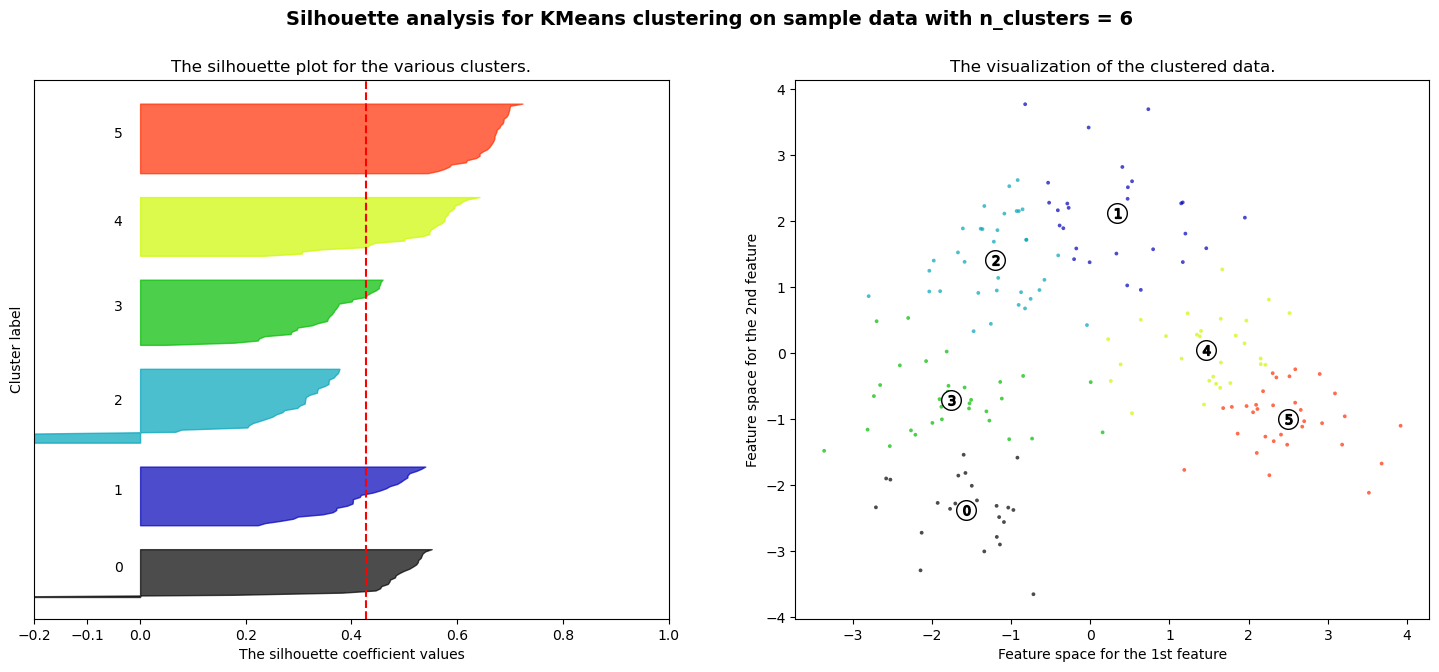

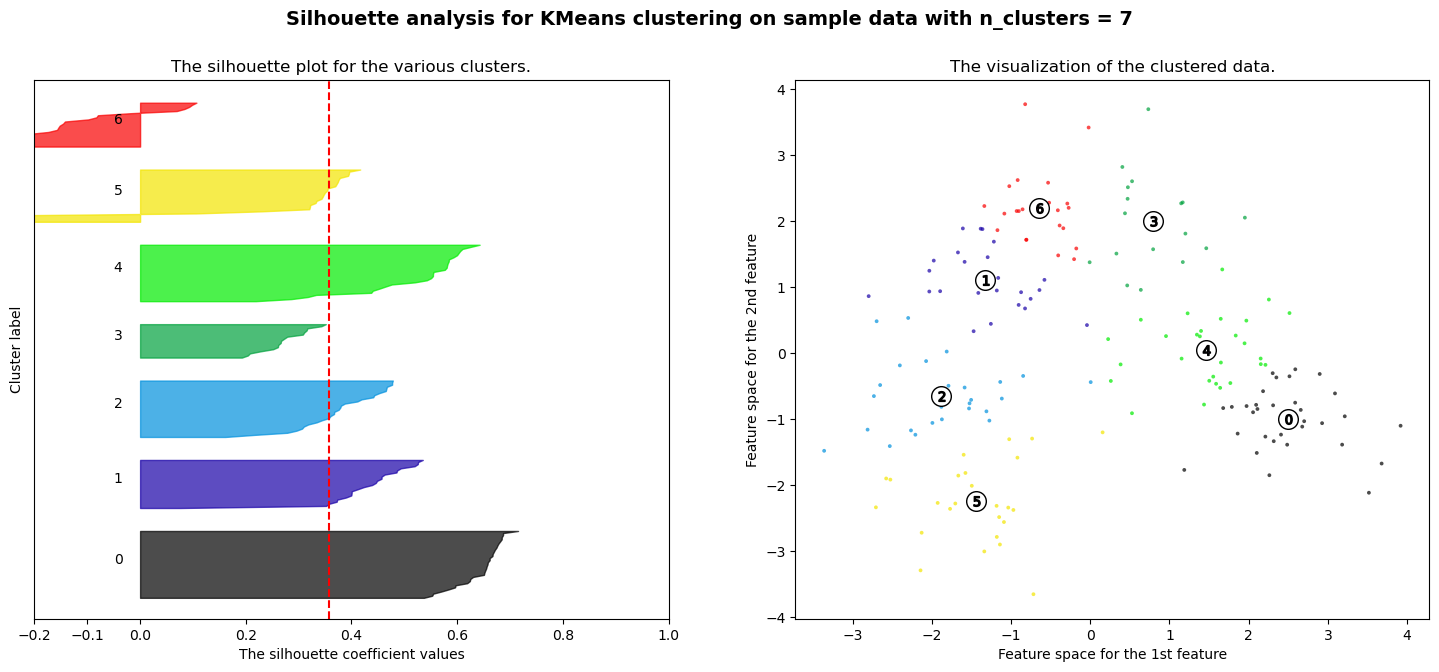

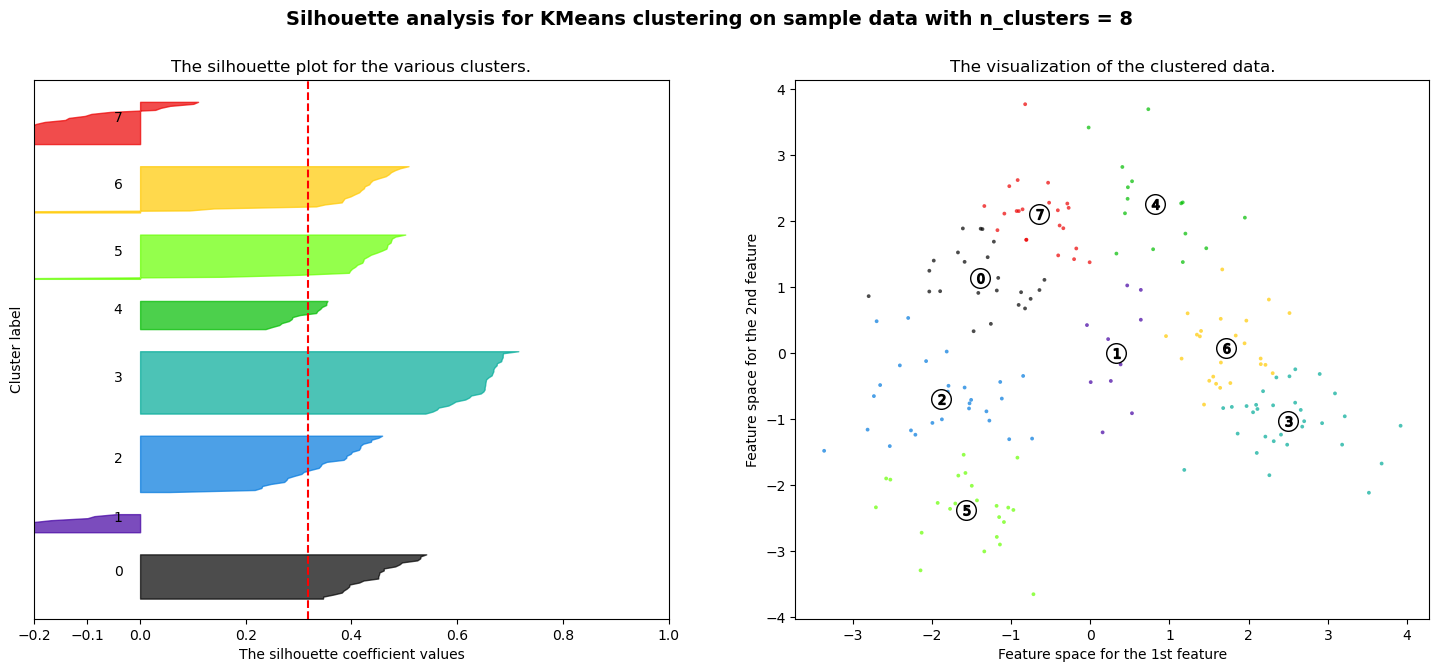

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x=pca_data["p1"], y=pca_data["p2"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the silhouette plot, it is clear that the dataset with 3 number of clusters has no negative silhouette score. This means it does validates with elbow method as K=3. 

A negative value in silhouette score means that the clustering algorithm has performed poorly and the clustering is not well-defined. The silhouette score measures how similar an object is to its own cluster compared to other clusters, and it ranges from -1 to 1. A score close to 1 indicates that the object is well-matched to its own cluster, while a score close to -1 means it is better suited to a different cluster.

A negative silhouette score indicates that the mean distance between an object and other objects in its cluster is greater than the distance between that object and the objects in the nearest neighboring cluster. In other words, the objects in the cluster are not very similar to each other, but they are more similar to objects in other clusters. This can happen if there are too many clusters or if the clustering algorithm is not appropriate for the data.